# Predicting Heart Disease

In [4]:
import pandas
import matplotlib.pyplot as plot
from visuals import disease_stats
import numpy
%matplotlib inline

In [5]:
dataframe = pandas.read_csv('cleveland.csv')

In [6]:
dataframe.shape

(303, 14)

In [7]:
dataframe.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Check for null values

In [8]:
dataframe.isnull().values.any()

True

In [9]:
print("Size before Dropping Rows with Missing Values:", len(dataframe))

Size before Dropping Rows with Missing Values: 303


In [10]:
dataframe = dataframe.dropna()

In [11]:
print("Size after Dropping Rows with Missing Values:", len(dataframe))

Size after Dropping Rows with Missing Values: 297


### Only predict If they will or will not have heart disease

In [12]:
dataframe.loc[dataframe['num'] != 0, 'num'] = 1

### Dataset Features

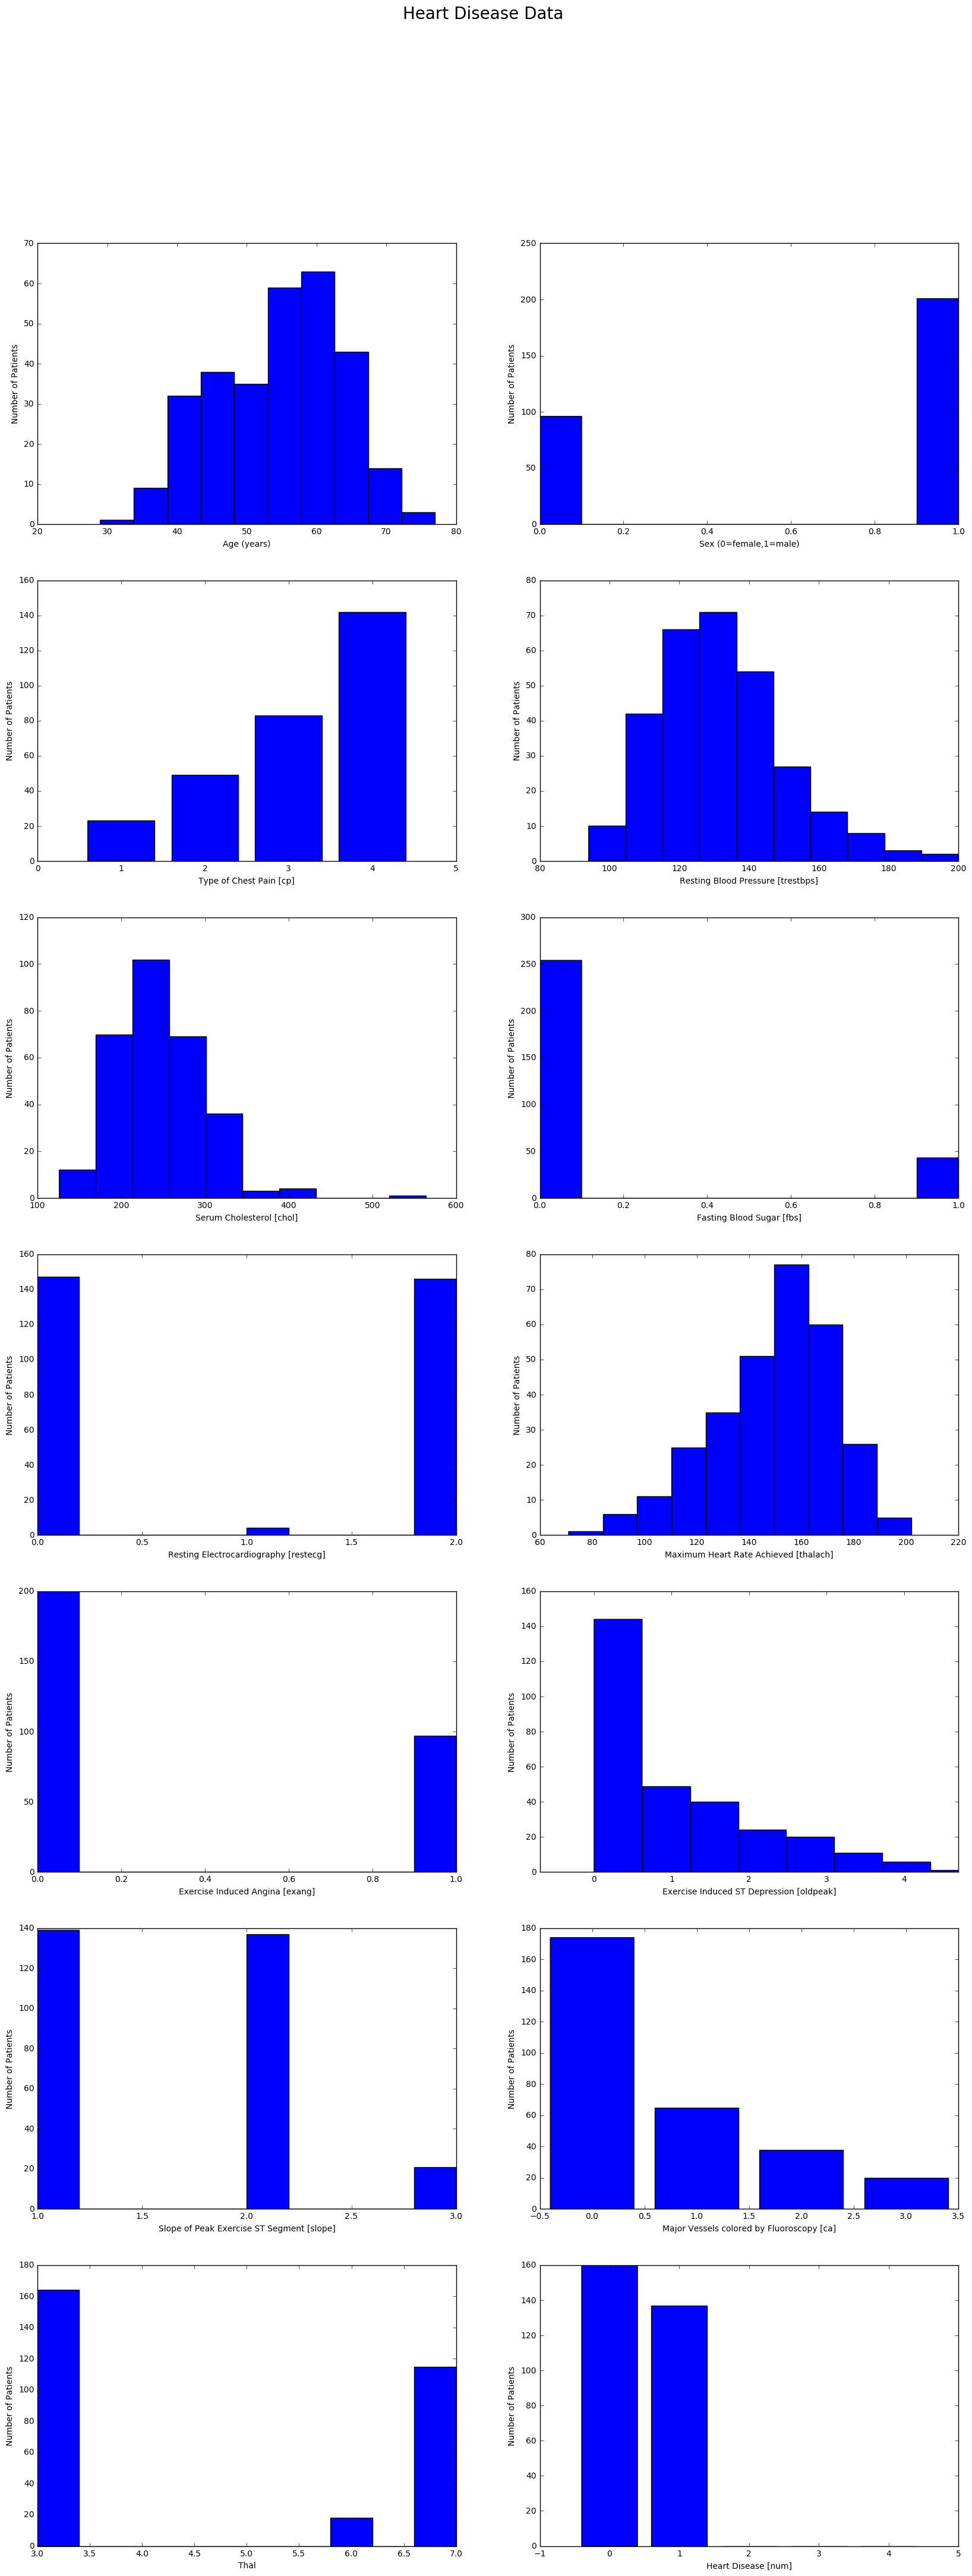

In [13]:
figure, axes = plot.subplots(nrows=7, ncols=2, figsize=(20,50) )
plot.suptitle("Heart Disease Data", fontsize=20)

axes[0,0].hist(dataframe.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")

axes[0,1].hist(dataframe.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")

axes[1,0].hist(dataframe.cp, bins=4, range=(0.5,4.5), rwidth=0.80)
axes[1,0].set_xlim(0.0,5.0)
axes[1,0].set_xlabel("Type of Chest Pain [cp]")
axes[1,0].set_ylabel("Number of Patients")

axes[1,1].hist(dataframe.trestbps)
axes[1,1].set_xlabel("Resting Blood Pressure [trestbps]")
axes[1,1].set_ylabel("Number of Patients")

axes[2,0].hist(dataframe.chol)
axes[2,0].set_xlabel("Serum Cholesterol [chol]")
axes[2,0].set_ylabel("Number of Patients")

axes[2,1].hist(dataframe.fbs)
axes[2,1].set_xlabel("Fasting Blood Sugar [fbs]")
axes[2,1].set_ylabel("Number of Patients")

axes[3,0].hist(dataframe.restecg)
axes[3,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[3,0].set_ylabel("Number of Patients")

axes[3,1].hist(dataframe.thalach)
axes[3,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[3,1].set_ylabel("Number of Patients")

axes[4,0].hist(dataframe.exang)
axes[4,0].set_xlabel("Exercise Induced Angina [exang]")
axes[4,0].set_ylabel("Number of Patients")

axes[4,1].hist(dataframe.oldpeak)
axes[4,1].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[4,1].set_ylabel("Number of Patients")

axes[5,0].hist(dataframe.slope)
axes[5,0].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[5,0].set_ylabel("Number of Patients")

axes[5,1].hist(dataframe.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[5,1].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[5,1].set_ylabel("Number of Patients")

axes[6,0].hist(dataframe.thal)
axes[6,0].set_xlabel("Thal")
axes[6,0].set_ylabel("Number of Patients")

axes[6,1].hist(dataframe.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[6,1].set_xlabel("Heart Disease [num]")
axes[6,1].set_ylabel("Number of Patients")

In [14]:
predictions = dataframe.num
features = dataframe.drop('num', axis=1)

In [15]:
print("Cleveland dataset now has {} data points with {} variables each.".format(*dataframe.shape))

Cleveland dataset now has 297 data points with 14 variables each.


### Correlation

In [16]:
dataframe.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


In [17]:
def plot_correlation(dataframe, size=10):
    corr = dataframe.corr() # Data Frame correlation function
    figure, axes = plot.subplots(figsize=(size, size))
    axes.matshow(corr) # Color code the rectangles by correlation value
    plot.xticks(range(len(corr.columns)), corr.columns) # Draw x tick marks
    plot.yticks(range(len(corr.columns)), corr.columns) # Draw y tick marks

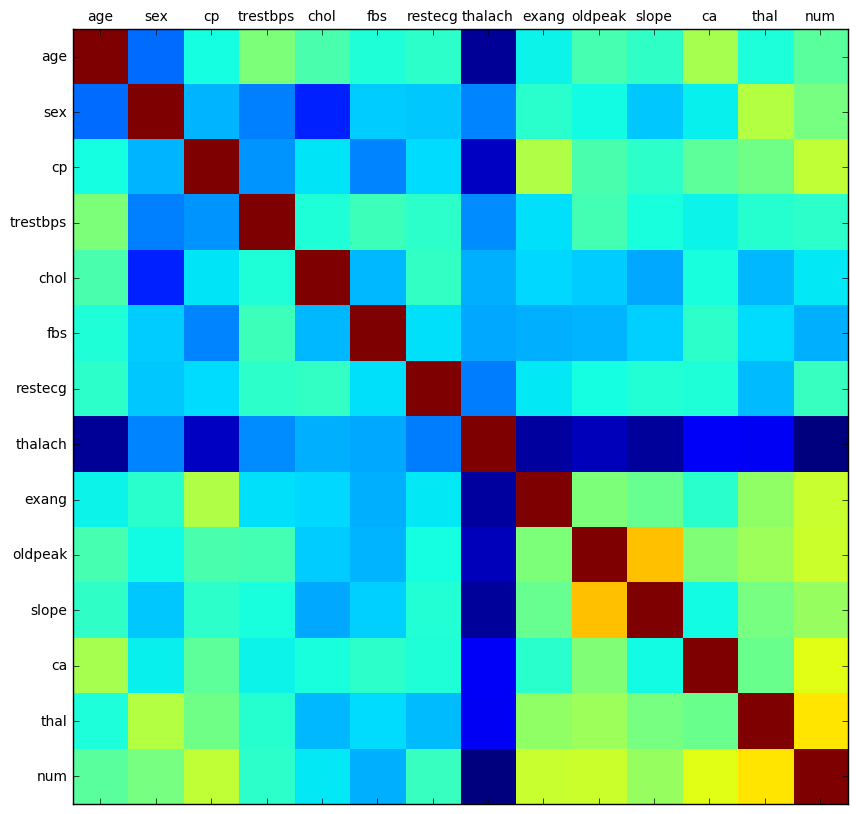

In [18]:
plot_correlation(dataframe)

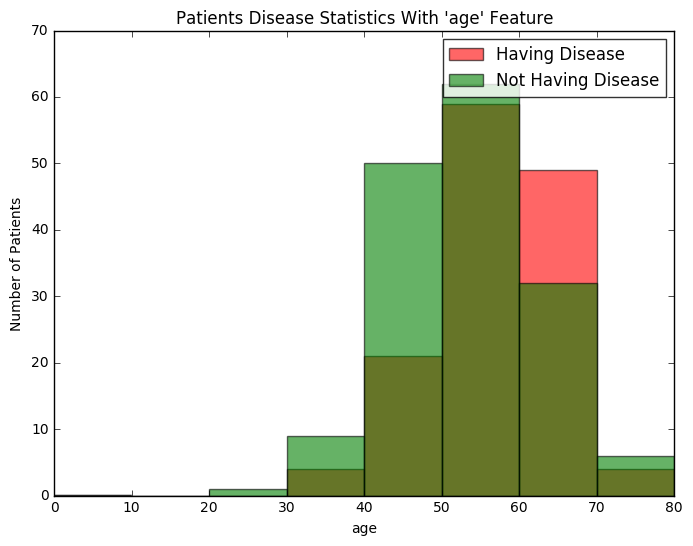

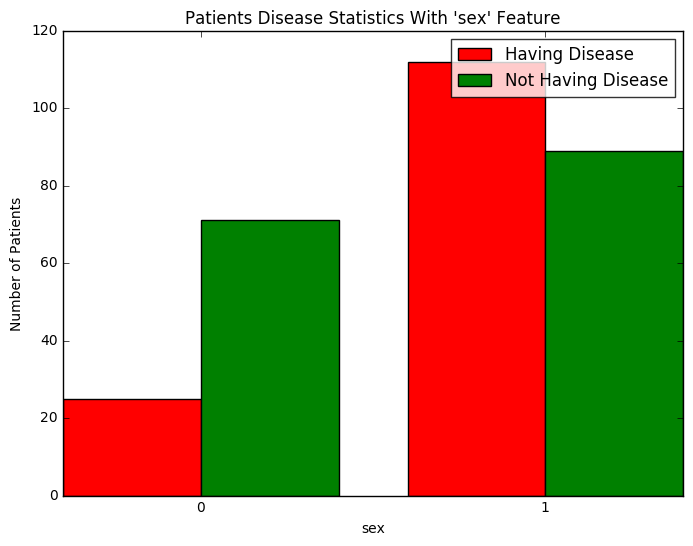

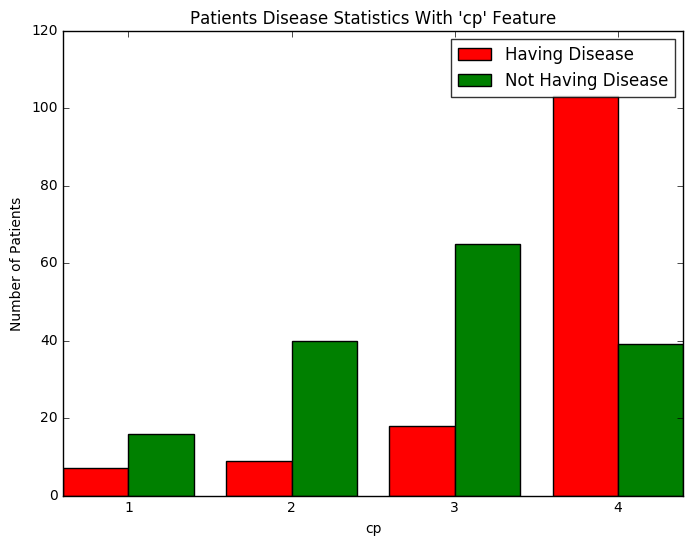

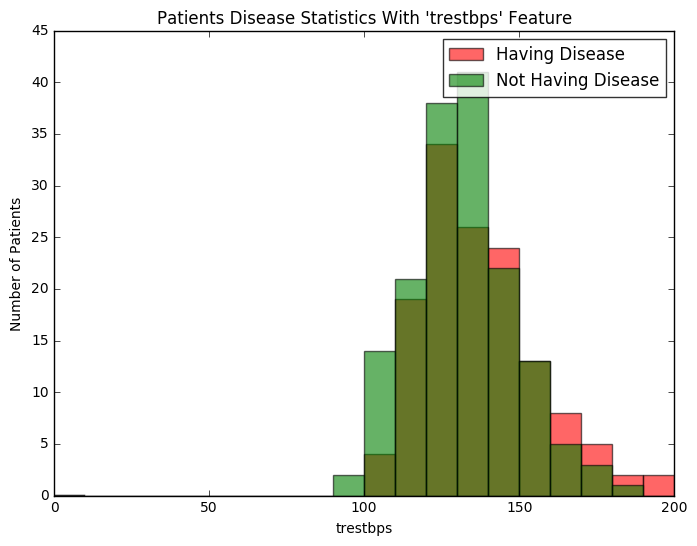

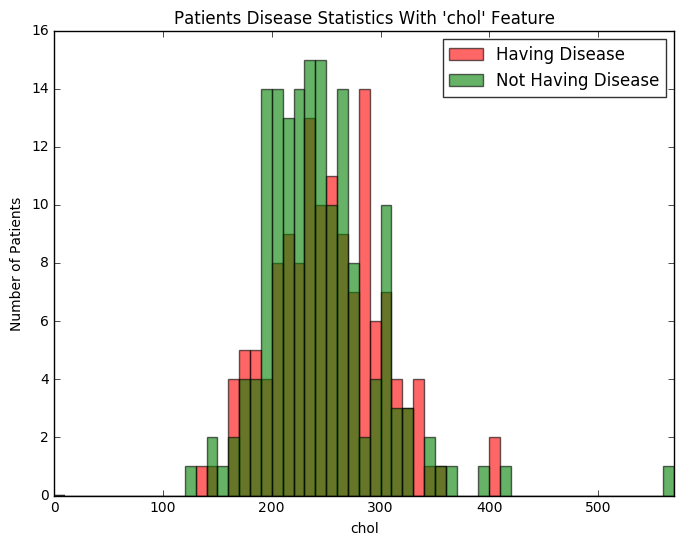

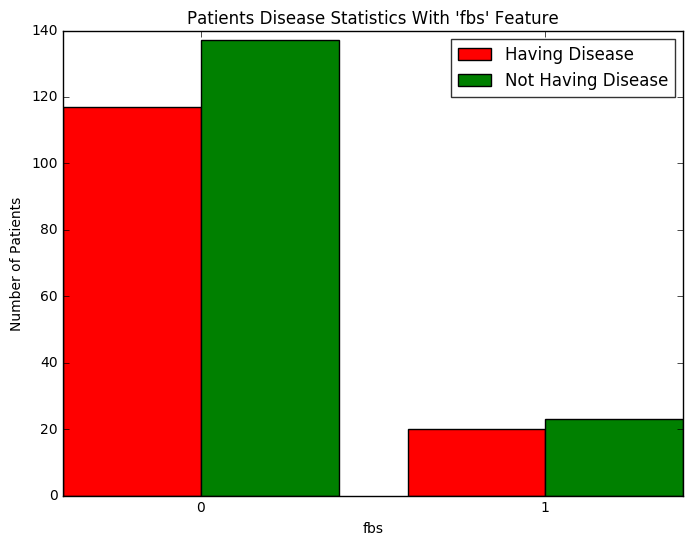

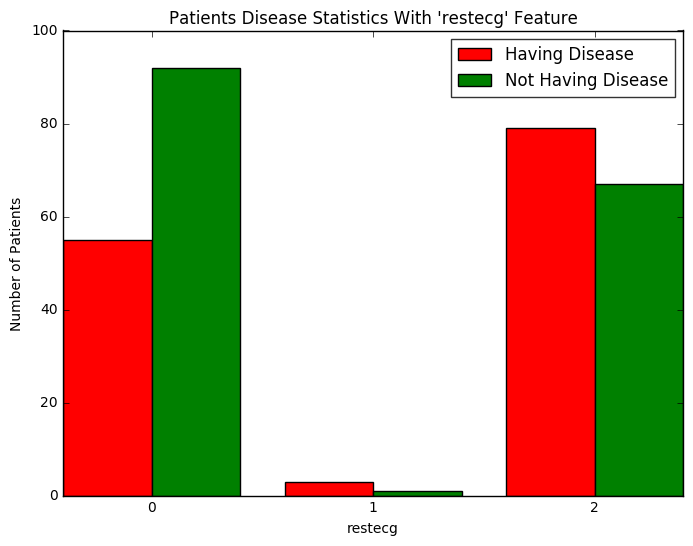

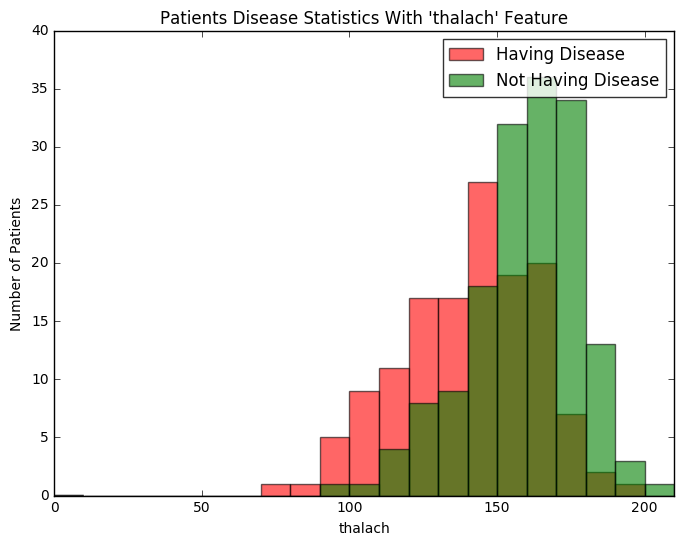

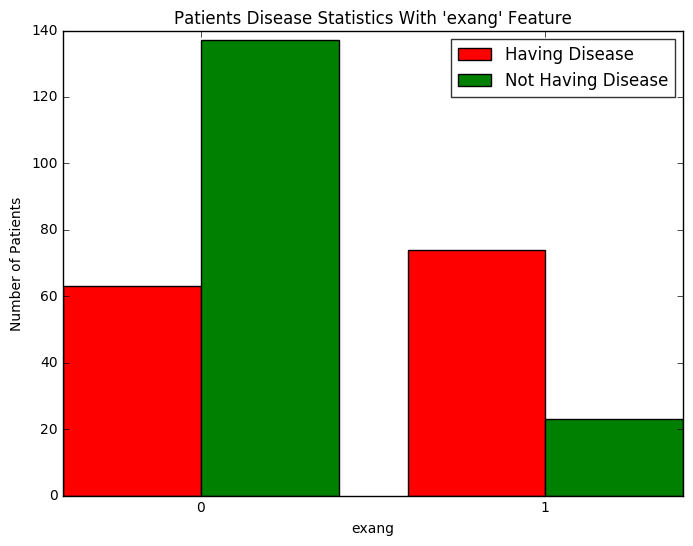

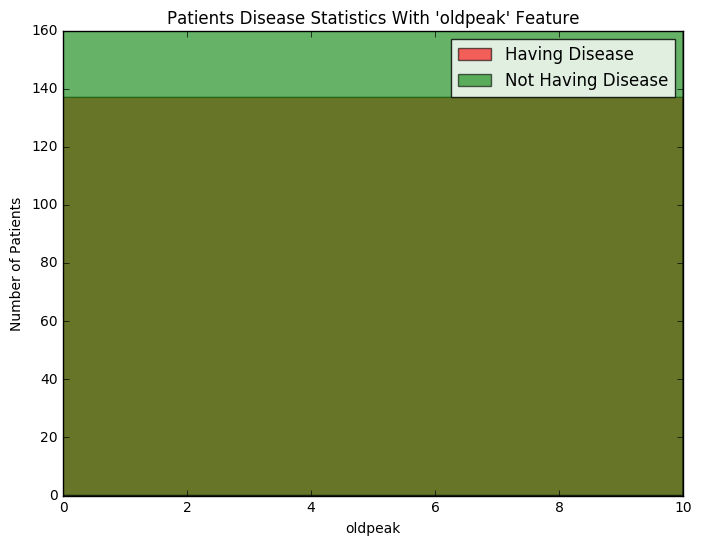

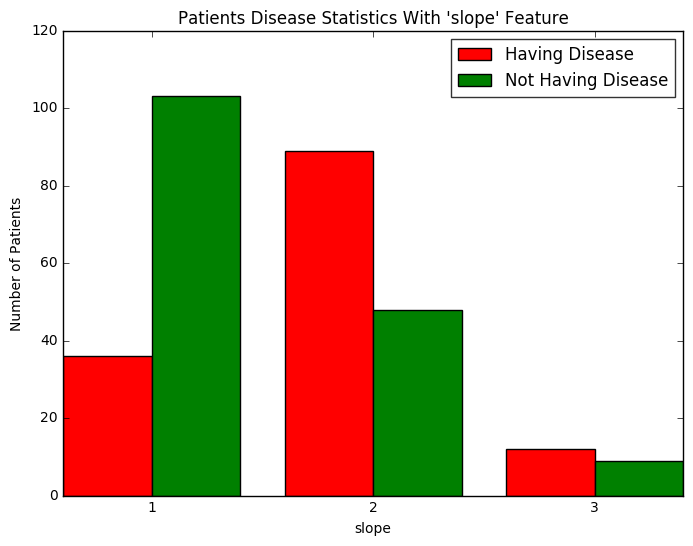

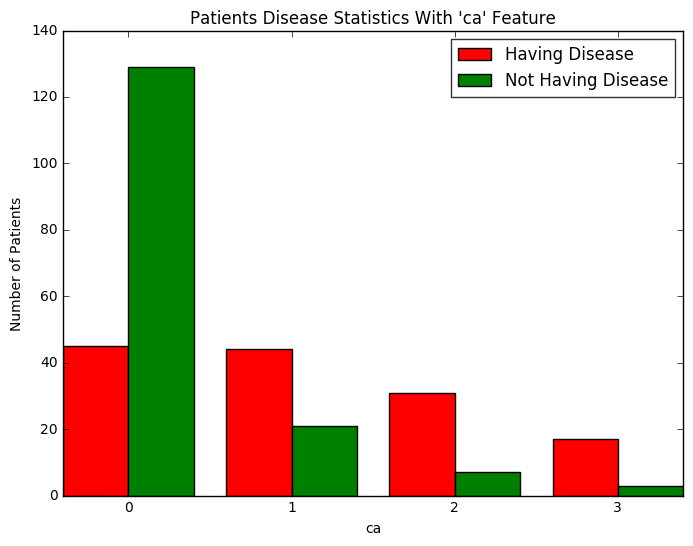

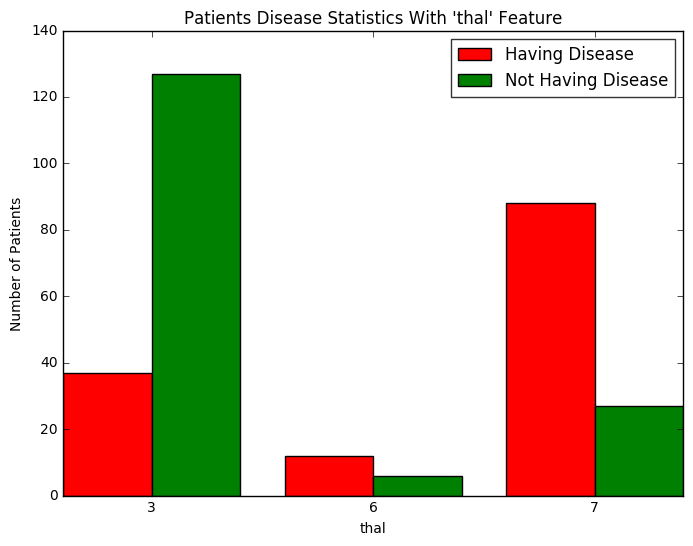

In [16]:
for key in features.columns.values:
    disease_stats(features, predictions, key)

In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, predictions, test_size=0.30, random_state=42)

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic Regression

In [45]:
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

best = {"mean_score": 0}
for length in range(9, 14):
    for columns in itertools.combinations(features.columns.values, length):
        model = LogisticRegression(penalty="l1",C=0.8, random_state=37)
        scores = cross_val_score(model, features[list(columns)], predictions, cv=10, scoring='accuracy')
        result = {"columns": columns, "mean_score": scores.mean(), "scores": scores}
        if best["mean_score"] < result["mean_score"]:
            best = result

In [46]:
print(best)

{'columns': ('sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'), 'mean_score': 0.85873563218390814, 'scores': array([ 0.9       ,  0.83333333,  0.86666667,  0.96666667,  0.83333333,
        0.76666667,  0.8       ,  0.93103448,  0.79310345,  0.89655172])}


In [47]:
columns = list(best['columns'])
model = LogisticRegression(penalty="l1",C=4.2, random_state=37)
accuracies = cross_val_score(model, features[list(columns)], predictions, cv=10, scoring='accuracy')
fscores = cross_val_score(model, features[list(columns)], predictions, cv=10, scoring='f1')

In [48]:
print("\nBest Results using:")
print(columns)

print(accuracies)
print(accuracies.mean())
print(fscores)
print(fscores.mean())


Best Results using:
['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
[ 0.9         0.83333333  0.86666667  0.93333333  0.86666667  0.73333333
  0.76666667  0.89655172  0.79310345  0.86206897]
0.845172413793
[ 0.88        0.81481481  0.84615385  0.92857143  0.85714286  0.73333333
  0.75862069  0.88888889  0.75        0.84615385]
0.830367970471


### Tuning Params

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
c_values = numpy.arange(0.1,10,0.1).tolist()

In [51]:
param_grid = dict(C=c_values)
print(param_grid)

{'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001, 1.5000000000000002, 1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5000000000000004, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0000000000000004, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5000000000000004, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1, 4.2, 4.3, 4.3999999999999995, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.700000000000001, 9.8, 9.9]}


In [52]:
lr = LogisticRegression(penalty="l1",C=0.8, random_state=37)
grid = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [53]:
columns = ['age', 'sex', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

grid.fit(features[columns], predictions)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=37, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001, 1.5000000000000002, 1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.40000000000000... 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.700000000000001, 9.8, 9.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [54]:
grid.cv_results_

{'mean_fit_time': array([ 0.00645378,  0.00730457,  0.00790524,  0.00710459,  0.0066041 ,
         0.00920589,  0.00710466,  0.00845523,  0.00930572,  0.00845563,
         0.01050675,  0.01012216,  0.01175766,  0.01045675,  0.01160765,
         0.01621056,  0.01606016,  0.01811149,  0.01941254,  0.01761236,
         0.01906219,  0.01931255,  0.01586013,  0.0150599 ,  0.01606019,
         0.01335847,  0.01490958,  0.01260812,  0.01641097,  0.01325853,
         0.01355867,  0.01470947,  0.01215763,  0.01315846,  0.01430933,
         0.01310844,  0.0140893 ,  0.01400878,  0.01370904,  0.01676087,
         0.01510959,  0.01611047,  0.01450942,  0.01395881,  0.01736145,
         0.01571012,  0.0152097 ,  0.01681058,  0.01641042,  0.01535978,
         0.01586022,  0.01711128,  0.01756139,  0.0179117 ,  0.01581016,
         0.01766167,  0.01576009,  0.01751111,  0.01906254,  0.01636047,
         0.01581039,  0.01661091,  0.01701124,  0.01629081,  0.01535974,
         0.01556025,  0.016711  , 

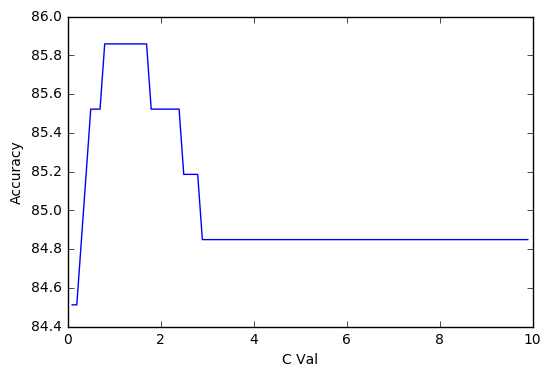

In [55]:
plot.plot(c_values, grid.cv_results_['mean_test_score']*100)
plot.xlabel("C Val")
plot.ylabel("Accuracy")

In [56]:
grid.best_score_

0.85858585858585856

In [57]:
grid.best_params_

{'C': 0.8}

In [58]:
grid.best_estimator_

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=37, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
best = {"mean_score": 0}
for length in range(9, 14):
    for columns in itertools.combinations(features.columns.values, length):
        model = GaussianNB()
        scores = cross_val_score(model, features[list(columns)], predictions, cv=10, scoring='accuracy')
        result = {"columns": columns, "mean_score": scores.mean(), "scores": scores}
        if best["mean_score"] < result["mean_score"]:
            best = result

In [61]:
print(best)

{'columns': ('sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'), 'mean_score': 0.85839080459770112, 'scores': array([ 0.83333333,  0.86666667,  0.93333333,  0.96666667,  0.8       ,
        0.83333333,  0.83333333,  0.89655172,  0.75862069,  0.86206897])}


## SVM

In [21]:
from sklearn import svm
import itertools
from sklearn.cross_validation import cross_val_score

best = {"mean_score": 0}
for length in range(9, 14):
    for columns in itertools.combinations(features.columns.values, length):
        model = svm.SVC()
        scores = cross_val_score(model, features[list(columns)], predictions, cv=10, scoring='accuracy')
        result = {"columns": columns, "mean_score": scores.mean(), "scores": scores}
        if best["mean_score"] < result["mean_score"]:
            best = result

In [22]:
print(best)

{'mean_score': 0.81816091954022985, 'scores': array([ 0.83333333,  0.86666667,  0.83333333,  0.96666667,  0.8       ,
        0.76666667,  0.66666667,  0.82758621,  0.75862069,  0.86206897]), 'columns': ('sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal')}


## Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.cross_validation import cross_val_score

#best = {"mean_score": 0}
#for length in range(9, 14):
#for columns in itertools.combinations(features.columns.values, length):
columns = ('sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
model = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(13,20), random_state=1)
scores = cross_val_score(model, features[list(columns)], predictions, cv=10, scoring='accuracy')
result = {"columns": columns, "mean_score": scores.mean(), "scores": scores}

In [44]:
print(result)

{'mean_score': 0.84839080459770122, 'scores': array([ 0.86666667,  0.83333333,  0.86666667,  0.96666667,  0.86666667,
        0.83333333,  0.73333333,  0.93103448,  0.72413793,  0.86206897]), 'columns': ('sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')}
